In [0]:
#Importing all required libraries.

import numpy as np  
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 

In [2]:
from google.colab import drive

drive.mount('/content/gdrive') #Mounting our google drive on collab to directly use the dataset which we have manually uploaded to our google drive.

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
directory = 'gdrive/My Drive/Colab Notebooks'

In [4]:
%cd 'gdrive/My Drive/Colab Notebooks'

/content/gdrive/My Drive/Colab Notebooks


In [6]:
#Loading in our dataset
training_df = pd.read_csv('sign_mnist_train.csv')
testing_df  = pd.read_csv('sign_mnist_test.csv') 
training_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [0]:
training_df = training_df.values #Converting the pandas dataframe into numpy array

In [10]:

'''The images available in the dataset are 28x28 pixels. The dataset itself contains 27544 examples with each example having 784 features(28x28 = 784) and a label
column to denote which class it belongs to.'''
training_df

array([[  3, 107, 118, ..., 204, 203, 202],
       [  6, 155, 157, ..., 103, 135, 149],
       [  2, 187, 188, ..., 195, 194, 195],
       ...,
       [ 18, 174, 174, ..., 202, 200, 200],
       [ 17, 177, 181, ...,  64,  87,  93],
       [ 23, 179, 180, ..., 205, 209, 215]])

In [0]:
x_training = training_df[: , 1:]
y_training = training_df[: , 0] #Splitting the training numpy array into training_data and training_labels (our target values)


In [12]:
x_training

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [13]:
y_training #The labels in our dataset are different categories which have been assigned to each letter.
np.unique(y_training)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [14]:
#To check we have all the available labels
y_training.shape 

(27455,)

In [15]:
x_training[0].shape

(784,)

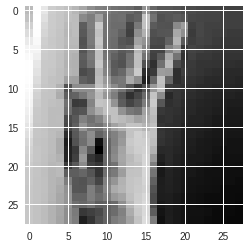

In [16]:
#Visualizing the first image available in our training dataset
plt.figure(figsize=(4,4))
plt.imshow(x_training[7].reshape(28,28)) 



In [17]:
x_training.shape

(27455, 784)

In [18]:
y_training.shape

(27455,)

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
#Labelising the given labels as binary. So each class will have a unique numpy array of 0s and 1s
label_binarizer = LabelBinarizer() 
y_training = label_binarizer.fit_transform(y_training)

In [21]:
y_training[7] #This particular example correspongs to the 22nd class which is letter X in the dataset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

In [0]:
x_training = x_training/255 #Normalizing the data

In [23]:
'''Our CNN will be accepting the inputs in (28x28x1) shape where 1 represents the 1 grayscale channel.Hence in this step we are reshaping all of the images to 28x28 
so that these can be later fed into the network.'''


x_training = np.array([np.reshape(i , (28,28,1)) for i in x_training])
x_training.shape

(27455, 28, 28, 1)

In [0]:
x_training 

In [0]:
model = keras.Sequential([
    
    #LAYER 1
    keras.layers.Conv2D(16 , kernel_size = (3,3) , activation='relu' , input_shape = (28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    #LAYER 2
    keras.layers.Conv2D(32 , kernel_size = (3,3) , activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    #LAYER 3
#     keras.layers.Conv2D(64 , kernel_size = (3,3) , activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    #LAYER 4
    keras.layers.Dense(128 , activation='relu'),
    keras.layers.Dropout(0.40), #DropOut layer to prevent overfitting with 20% ratio
    #LAYER 5
    
    keras.layers.Dense(24 , activation='softmax') #Using softmax activation function because we have multiple classes to predict.
    
    
    
])

In [0]:
model.compile(loss = ['categorical_crossentropy'] , 
              optimizer = tf.train.AdamOptimizer(), 
              metrics = ['accuracy']
             )


In [78]:
#While training the model we will use 20% of the training data for cross-validation.As you can see below we achieved very high accuracies for both the training and validation data.
history = model.fit(x_training , y_training , validation_split=0.2 , epochs = 20 , batch_size= 128) 

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 2s 101us/step - loss: 2.5118 - acc: 0.2486 - val_loss: 1.3265 - val_acc: 0.6482
Epoch 2/20
21964/21964 [==============================] - 2s 71us/step - loss: 1.2023 - acc: 0.6150 - val_loss: 0.5916 - val_acc: 0.8454
Epoch 3/20
21964/21964 [==============================] - 2s 70us/step - loss: 0.7270 - acc: 0.7608 - val_loss: 0.3265 - val_acc: 0.9242
Epoch 4/20
21964/21964 [==============================] - 2s 70us/step - loss: 0.4998 - acc: 0.8352 - val_loss: 0.1957 - val_acc: 0.9625
Epoch 5/20
21964/21964 [==============================] - 2s 70us/step - loss: 0.3549 - acc: 0.8851 - val_loss: 0.1215 - val_acc: 0.9772
Epoch 6/20
21964/21964 [==============================] - 2s 71us/step - loss: 0.2652 - acc: 0.9148 - val_loss: 0.0711 - val_acc: 0.9934
Epoch 7/20
21964/21964 [==============================] - 2s 71us/step - loss: 0.1985 - acc: 0.9382 - val_loss: 0.0385 - val_acc

In [0]:
testing_df.head(5)

In [0]:
testing_df = testing_df.values #Converting the pandas dataframe into numpy arrays.

In [0]:
x_test = testing_df[: , 1:]
y_test = testing_df[: , 0]

In [31]:
x_test

array([[149, 149, 150, ..., 112, 120, 107],
       [126, 128, 131, ..., 184, 182, 180],
       [ 85,  88,  92, ..., 225, 224, 222],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]])

In [32]:
y_test

array([ 6,  5, 10, ...,  2,  4,  2])

In [0]:
label_binarizer = LabelBinarizer()
y_test = label_binarizer.fit_transform(y_test)

In [34]:
x_test[0].shape

(784,)

In [35]:
x_test = np.array([np.reshape(i , (28,28,1)) for i in x_test])
x_test

array([[[[149],
         [149],
         [150],
         ...,
         [150],
         [150],
         [149]],

        [[150],
         [150],
         [150],
         ...,
         [151],
         [150],
         [151]],

        [[150],
         [151],
         [151],
         ...,
         [151],
         [151],
         [152]],

        ...,

        [[ 69],
         [ 69],
         [ 77],
         ...,
         [116],
         [113],
         [118]],

        [[ 74],
         [ 75],
         [ 76],
         ...,
         [110],
         [116],
         [113]],

        [[ 75],
         [ 74],
         [ 74],
         ...,
         [112],
         [120],
         [107]]],


       [[[126],
         [128],
         [131],
         ...,
         [133],
         [134],
         [132]],

        [[129],
         [132],
         [134],
         ...,
         [136],
         [136],
         [134]],

        [[133],
         [135],
         [138],
         ...,
         [140],
         [

In [36]:
x_test.shape

(7172, 28, 28, 1)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_predicitions = model.predict(x_test) #Prediction on to the test set


In [80]:
accuracy_score(y_test , y_predicitions.round()) #Finally we achieved a testing accuracy of about 97.9% on the test set.

0.8966815393195762

In [81]:

#Downloading our model to be used in the opencv module.

from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk") 

Using TensorFlow backend.


Saved model to disk


In [0]:
from google.colab import files
files.download('model.h5')#Downloading the weights of our trained model
files.download('model.json')

In [83]:
model.summary() #A final summary of the model.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               102528    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________